In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from pprint import pprint

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


# Reading the dataset using Pandas

In [123]:
# Some missing values were represented as inf and -inf
na_values = ["inf","-inf"]

In [124]:
train = pd.read_csv('Train.csv', na_values=na_values)
test = pd.read_csv('Test.csv', na_values=na_values)

In [ ]:
print('train shape:', train.shape)
print('test shape:', test.shape)

In [106]:
train.head()

,id,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_361,column_362,column_363,column_364,column_365,column_366,column_367,column_368,column_369,column_370
0,0,15059.27,15376.02,28326.26,19587.18,2,1007.9608,3960.0965,3.6600,7.3174,...,0.0068,7078.3939,38.285,20.0,0.0,27,1,0,0,0
1,1,17455.22,38952.17,19410.83,25272.74,3,520.6264,1717.0405,0.0000,8.0772,...,0.0000,5566.8946,0.000,34.0,1.0,31,1,0,0,0
2,2,15359.09,3879.60,11571.05,10269.91,1,0.0000,1425.7998,0.0000,7.1665,...,0.0000,3821.4173,0.000,30.0,0.0,56,1,0,0,0
3,3,5605.87,6134.37,8585.83,6775.36,0,0.0000,291.0967,0.0000,4.1596,...,0.0000,1254.8651,0.000,14.0,0.0,31,0,0,0,0
4,4,10572.48,10403.86,7721.41,9565.92,1,0.0000,2530.3404,3.9933,3.7377,...,-0.0032,3581.9975,-12.345,2.0,0.0,55,0,0,1,0


In [107]:
test.head()

,id,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,...,column_361,column_362,column_363,column_364,column_365,column_366,column_367,column_368,column_369,column_370
0,0,317.6870,1419.7523,0.0000,7.3778,20.8500,0.0,0.6667,9.0517,15.2300,...,0.0000,3961.7543,0.00,24.0,1.0,23,1,0,0,0
1,1,0.0000,1147.3111,0.0000,6.4608,53.7567,0.0,1.0000,9.7730,24.3267,...,0.0000,1991.3987,0.00,17.0,0.0,38,0,0,0,1
2,2,45.3894,1331.8722,7.1933,2.1552,85.8633,0.0,0.3333,13.0650,31.0000,...,0.0122,2666.0984,75.19,2.0,0.0,46,0,1,0,0
3,3,0.0000,743.1287,0.0000,6.9048,8.6600,5.0,0.0000,5.4300,83.9767,...,0.0000,2398.4816,0.00,29.0,1.0,53,0,1,0,0
4,4,0.0000,261.8643,0.0000,3.1889,0.0000,0.0,0.3333,0.0000,0.0000,...,0.0000,1338.8069,0.00,2.0,0.0,43,0,0,1,0


# Splitting train dataset

In [108]:
X = train.drop(['id','column_1','column_2','column_3','column_4','column_5'],axis=1)
Y = train['column_5']

In [109]:
X.head()

,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,...,column_361,column_362,column_363,column_364,column_365,column_366,column_367,column_368,column_369,column_370
0,1007.9608,3960.0965,3.6600,7.3174,394.4033,0.6667,0.8580,16.4128,88.0800,239.4438,...,0.0068,7078.3939,38.285,20.0,0.0,27,1,0,0,0
1,520.6264,1717.0405,0.0000,8.0772,79.7667,2.6667,0.0000,6.1967,21.9933,882.0933,...,0.0000,5566.8946,0.000,34.0,1.0,31,1,0,0,0
2,0.0000,1425.7998,0.0000,7.1665,152.6967,0.0000,0.0000,0.0000,46.9900,0.0000,...,0.0000,3821.4173,0.000,30.0,0.0,56,1,0,0,0
3,0.0000,291.0967,0.0000,4.1596,47.9833,5.3333,0.0000,0.0000,0.0000,0.0000,...,0.0000,1254.8651,0.000,14.0,0.0,31,0,0,0,0
4,0.0000,2530.3404,3.9933,3.7377,87.7833,0.0000,1.2882,10.3333,40.7700,0.0000,...,-0.0032,3581.9975,-12.345,2.0,0.0,55,0,0,1,0


In [110]:
Y.head()

0    2
1    3
2    1
3    0
4    1
Name: column_5, dtype: int64

# Handling missing values

In [111]:
X.fillna(X.mean(skipna=True), inplace=True)

In [112]:
missing = X.isnull().sum()
missing.sum()

0

Now we are sure that every NaN was replaced by column`s mean value

# Using Random Forest model from sklearn

Tuning parameters with randomized search

In [150]:
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 3, 5]
bootstrap = [True, False]

In [151]:
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 5],
 'min_samples_split': [2, 5, 10, 20],
 'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}


In [152]:
# Using the random grid to search for best hyperparameters
rforest = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rforest, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)


In [153]:
rf_random.fit(X, Y.values)
params = rf_random.best_params_
pprint(params)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.3min finished
{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 18}


 Fitting Random Forest Classifier with the best parameters from Randomized Search

In [154]:
rforest = RandomForestClassifier(**params)
rforest.fit(X , Y)


RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=18)

Measuring performance on the training set

In [155]:
Y_train_predicted = rforest.predict(X)

0.9886420245093155

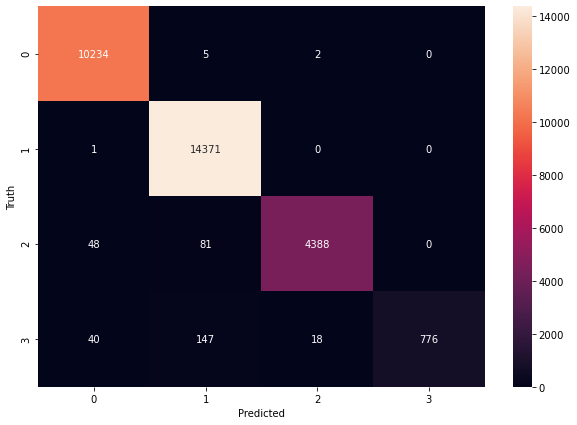

In [156]:
cmrforest = confusion_matrix(Y.values, Y_train_predicted)

plt.figure(figsize=(10,7))
sn.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
rforest.score(X,Y)

# Making predictions on test data

In [157]:
X_test = test.drop(['id'],axis=1)
X_test.fillna(X_test.mean(skipna=True), inplace=True)

In [158]:
Y_predicted = rforest.predict(X_test)

In [160]:
index = np.arange(0, Y_predicted.shape[0])
data = {'id':index, 'column_5':Y_predicted}
df = pd.DataFrame(data=data)
df.head()

,id,column_5
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [161]:
df.to_csv('out.csv', index=False)